# Mushroom Dataset (Binary Classification)
Author: Morariu Tudor

## Citirea Datelor si Procesarea Datelor

### Importarea librariilor necesare

In [177]:
import pandas as pd
import numpy as np

In [178]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [179]:
from time import gmtime, strftime

def watermark():
  return "Tudor Morariu, generated at: " + strftime("%H:%M:%S", gmtime());

### Citim Datasetul

Folosim pandas.

In [180]:
data = pd.read_csv("mushroom_cleaned.csv");
display(data);

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


*   **Obs**: Toate valorile sunt numere. 

### Plotare

Plotarea ajuta la intelegerea datasetului.

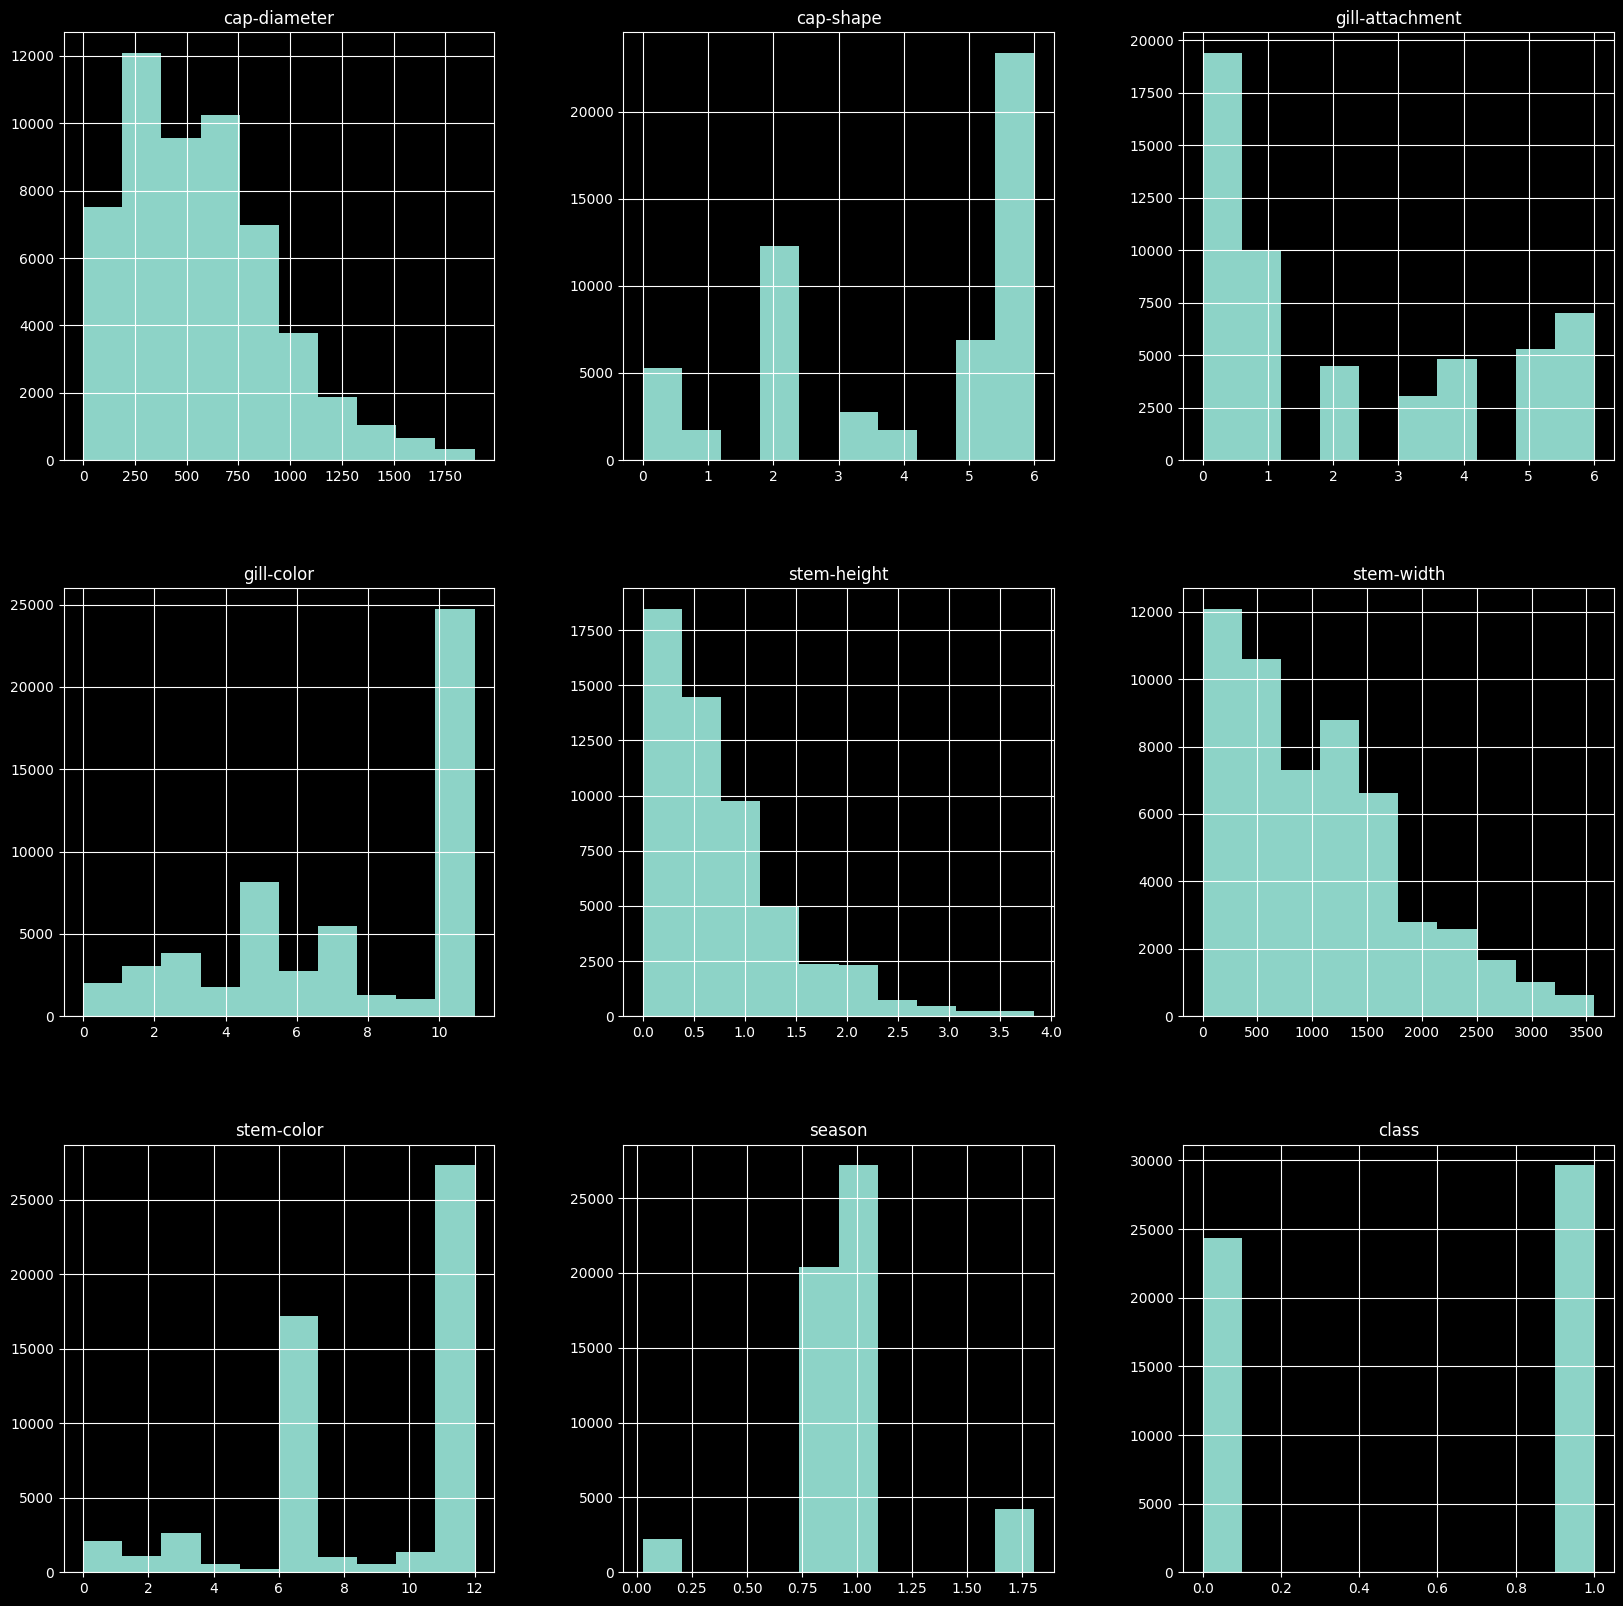

In [181]:
data.hist(figsize=(20, 20));

<Axes: >

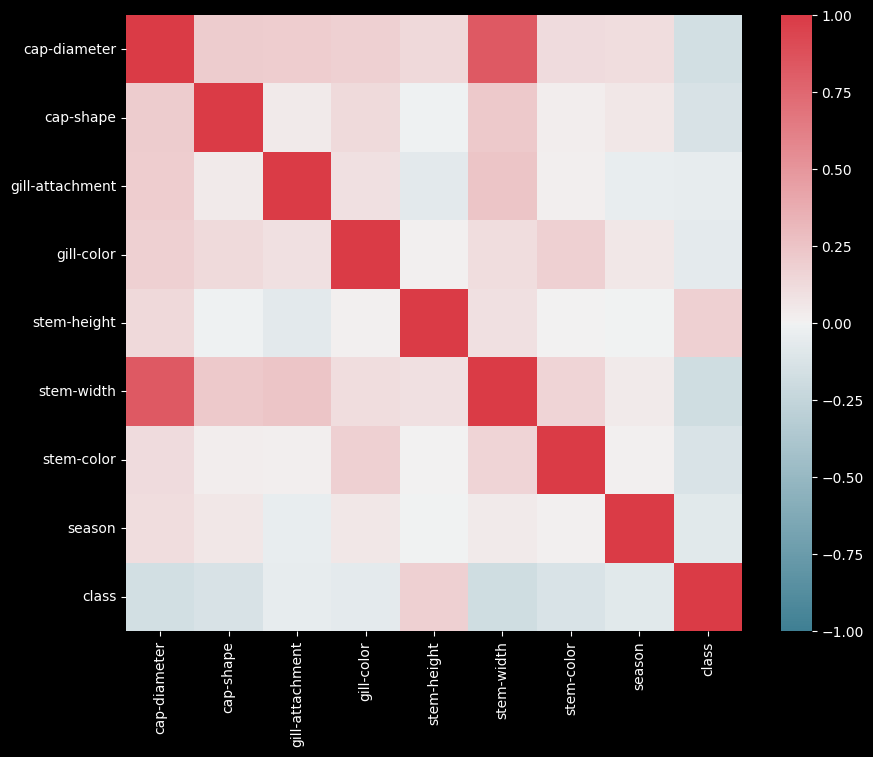

In [182]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

*   **Obs**: Coloana "stem-width" este corelate destul de puternic cu "cap-diameter"

### Normalizare

Datasetul trebuie normalizat din cauza coloanelor care au valori foarte mari in comparatie cu celelalte ("cap-diameter", "stem_height")

In [183]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();

data = pd.DataFrame(scaler.fit_transform(data));

display(data);

,0,1,2,3,4,5,6,7,8
0,0.725542,0.333333,0.333333,0.909091,0.992737,0.432894,0.916667,1.000000,1.0
1,0.772607,0.333333,0.333333,0.909091,0.992737,0.436257,0.916667,1.000000,1.0
2,0.725013,0.333333,0.333333,0.909091,0.941896,0.438778,0.916667,1.000000,1.0
3,0.666843,1.000000,0.333333,0.909091,0.987549,0.438778,0.916667,1.000000,1.0
4,0.690111,1.000000,0.333333,0.909091,0.967835,0.410199,0.916667,0.515404,1.0
...,...,...,...,...,...,...,...,...,...
54030,0.038604,0.833333,0.500000,0.181818,0.231379,0.159428,1.000000,0.515404,1.0
54031,0.043363,0.333333,0.500000,0.181818,0.309197,0.137293,1.000000,0.515404,1.0
54032,0.043363,0.833333,0.500000,0.181818,0.238642,0.163631,1.000000,0.484596,1.0
54033,0.041777,0.333333,0.500000,0.181818,0.269769,0.137574,1.000000,0.484596,1.0


### PCA Plot

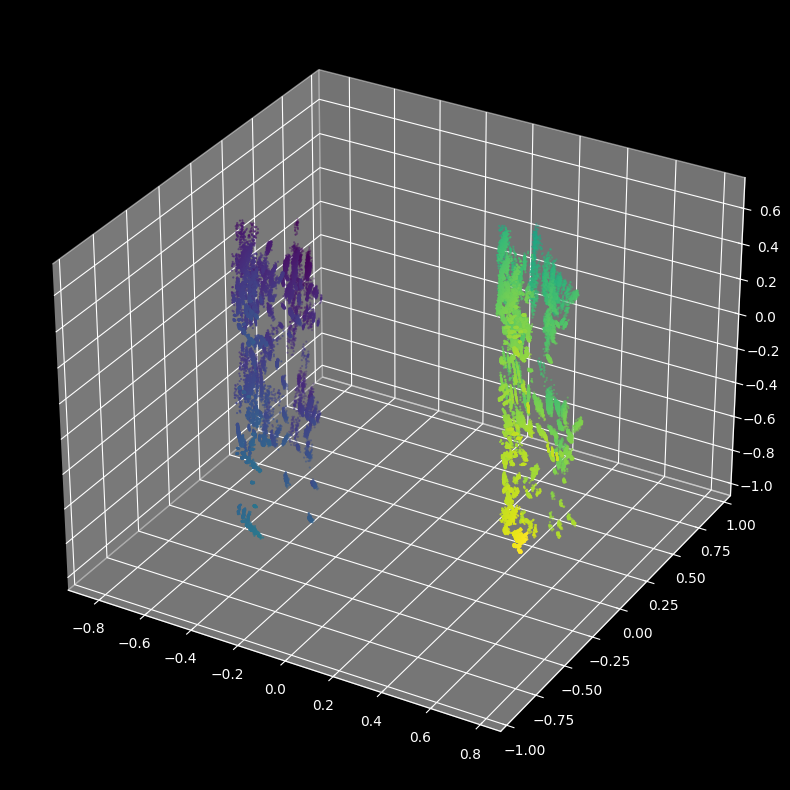

In [197]:
from sklearn.decomposition import PCA

pca3d = PCA(n_components=3);
points3d = pca3d.fit_transform(data);

fig = plt.figure()
ax = plt.axes(projection ='3d')


pointsx = [];
pointsy = [];
pointsz = [];

for x, y, z in points3d:
    pointsx.append(x);
    pointsy.append(y);
    pointsz.append(z);

fig.set_figwidth(10);
fig.set_figheight(10);
ax.scatter(pointsx, pointsy, pointsz, cmap="viridis", c=pointsx, s=0.3);

*   Se observa clar doua grupe de puncte.

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=[8]);
labels = data[8];

train_f, test_f, train_l, test_l = train_test_split(features, labels, test_size=0.3);

## Selectia si Antrenarea modelului

### Selectia Modelului

Voi selecta un MLP Classifier deoarece este simplu de implementat.

Alternativ as putea face un Neural Network folosing keras si tensorflow sau un Logistical Regression din sklearn.

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='adam', verbose=0, tol=1e-8, random_state=1, learning_rate_init=.01);

N_TRAIN_SAMPLES = train_f.shape[0]
N_EPOCHS = 200
N_BATCH = 64
N_CLASSES = np.unique(train_l)

scores_train = []
scores_test = []

train_f = train_f.values
train_l = train_l.values
test_f = test_f.values
test_l = test_l.values

epoch = 0
while epoch < N_EPOCHS:
    print('Epoch: ', epoch)

    random_perm = np.random.permutation(train_f.shape[0])
    mini_batch_index = 0
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        model.partial_fit(train_f[indices], train_l[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    scores_train.append(model.score(train_f, train_l))
    scores_test.append(model.score(test_f, test_l))

    epoch += 1


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

### Plotarea Erorri si a Acuratetii

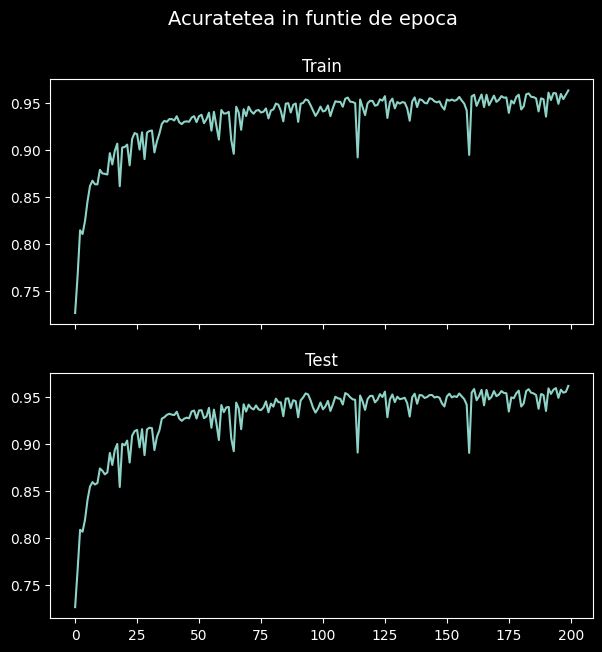

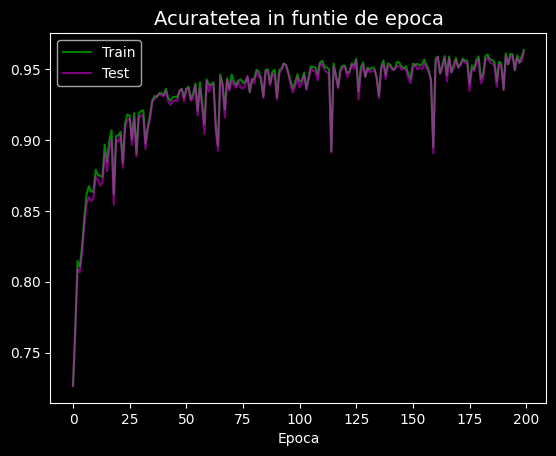

In [ ]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)

fig.set_figwidth(7);
fig.set_figheight(7);

ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Acuratetea in funtie de epoca", fontsize=14)

plt.show()

plt.plot(scores_train, color='green', alpha=1, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.5, label='Test')
plt.title("Acuratetea in funtie de epoca", fontsize=14)
plt.xlabel('Epoca')
plt.legend(loc='upper left')
plt.show()

### Calcularea scor $R^2$ 

In [ ]:
print(model.score(test_f, test_l));

0.9619394238480045
